<h2 align="center"> Phase 1 and Phase 2 : dataRequirement, data Collection  data understanding  & data preparation</h2> 








# Library installation



---



---



In [ ]:
import re
import pandas as pd
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
import nltk
import string
from nltk.corpus import stopwords
import string
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
!pip3 install googletrans==3.1.0a0
from googletrans import Translator
from textblob import TextBlob
import re
import spacy
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from collections import defaultdict
from heapq import nlargest
nlp = spacy.load("en_core_web_sm")
from spacy.lang.en.stop_words import STOP_WORDS
STOP_WORDS = STOP_WORDS.union({'ll', 've', 'pron'})
!pip install emoji
import emoji
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from collections import defaultdict
from heapq import nlargest

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

#Import DataSet

In [ ]:
import pandas as pd
df=pd.read_csv('/content/joboffers.csv')

### Dataframe shape is  3985 rows and 7 columns  : containing a total of 3985 jobs

In [ ]:
print('Dataframe shape is {}, containing a total of {} jobs'.format(df.shape,df.shape[0]))

Dataframe shape is (3985, 7), containing a total of 3985 jobs


📜 All data was directly scraped from the Linkedin.com career platform and contains the following:

Columns:

* **Job Title** : title of position (str)
* **Job Description** : complete description of position (str)
* **Job Location**  : city and country information (str)
* **PostedAt** : the date when the offer was posted (date)
* **CompanyName** : Company Name (str)
* **Workplace Type**  :  where people perform tasks, jobs and projects for their    employer (str)
* **Job Type**  :provide a way to categorize your work and processes (str)







#Translation

We observe that our dataframe contains different languages, which makes it difficult to effectively analyze and compare the data, so we decide to translate it to the same language. 

In [ ]:
!pip install EasyNMT

In [ ]:
from easynmt import EasyNMT
model = EasyNMT("mbart50_m2m")
def translate_text(text):
    return model.translate(text, target_lang='en')

In [ ]:
df['companyName'] = df['companyName'].apply(translate_text)
df['jobTitle'] = df['jobTitle'].apply(translate_text)
df['jobLocation'] = df['jobLocation'].apply(translate_text)
df['JobType'] = df['JobType'].apply(translate_text)
df['JobDescription'] = df['JobDescription'].apply(translate_text)

# Check missing value
we notice that we have missing values : 
* CompanyName  :     91
* JobTitle    :        0
* JobLocation :        0
* PostedAt   :         0
* JobDescription  :    2
* WorkplaceType  :   225
* JobType    :         0


In [ ]:
df = df.dropna(subset=['companyName'])
df = df.dropna(subset=['jobType'])

# **Check Duplication**

In [ ]:
duplicates = df1.duplicated()
# count the number of duplicates
num_duplicates = duplicates.sum()
# print the number of duplicates
print("Number of duplicates: ", num_duplicates)

Number of duplicates:  0


In [ ]:
df = df.drop_duplicates()

In [ ]:
duplicates = df1.duplicated()
# count the number of duplicates
num_duplicates = duplicates.sum()
# print the number of duplicates
print("Number of duplicates: ", num_duplicates)

Number of duplicates:  0


## We 'll start by getting to know the dataset a bit better through visualizations.


*   Number of Jobs
*   Location
*   Job Description
*   PostedAt 
*   CompanyName
*   Workplace Type 





# **Data cleaning**

* Remove stopWord punctuation , whitespaces and clean text




---



In [ ]:
nlp = spacy.load("en_core_web_sm")
STOP_WORDS = STOP_WORDS.union({'ll', 've', 'pron'})
import re
def wordlowercase(text):
  return text.lower()
def remove_punctuation(text):
    return re.sub(r'[^a-zA-Z0-9]', ' ', text)
    # Remove Extra Whitespaces
def remove_whitespaces(text):
    #return re.sub(r'^\s*|\s\s*', ' ', text).strip()
    return re.sub(' +', ' ', text)
def clean_text(raw):
    '''Case specific to be used with pandas apply method'''
    try:
        # remove carriage returns and new lines
        raw = raw.replace('\r', '')
        raw = raw.replace('\n', '')
        
        # brackets appear in all instances
        raw = raw.replace('[', '')
        raw = raw.replace(']', '')
        raw = raw.replace(')', '')
        raw = raw.replace('(', '')
        
        # removing html tags
        clean_html = re.compile('<.*?>')
        clean_text = re.sub(clean_html, ' ', raw)
        
        # removing duplicate whitespace in between words
        clean_text = re.sub(" +", " ", clean_text) 
        
        # stripping first and last white space 
        clean_text = clean_text.strip()
        
        # commas had multiple spaces before and after in each instance
        clean_text = re.sub(" , ", ", ", clean_text) 
        
        # eliminating the extra comma after a period
        clean_text = clean_text.replace('.,', '.')
        
        # using try and except due to Nan in the column
    except:
        clean_text = np.nan
        
    return clean_text
#Rmove Emoji 
def remove_emojis(text):
  emoji_pattern = re.compile(
    u"(\ud83d[\ude00-\ude4f])|"  # emoticons
    u"(\ud83c[\udf00-\uffff])|"  # symbols & pictographs (1 of 2)
    u"(\ud83d[\u0000-\uddff])|"  # symbols & pictographs (2 of 2)
    u"(\ud83d[\ude80-\udeff])|"  # transport & map symbols
    u"(\ud83c[\udde0-\uddff])"  # flags (iOS)
    "+", flags=re.UNICODE)
  return emoji_pattern.sub(r'', text)



---




## 💼 **Job Type** 




In [ ]:
import re
def remove_hyphens(text):

    return re.sub("-", "",str(text))

# apply the function to the 'text' column using applymap
def remove_hyphens1(text):
    return re.sub("/", "", text)
df['jobType'] = df['jobType'].replace('\d', '', regex=True)
df['jobType'] = df['jobType'].replace('[€$£¥₹]', '', regex=True)
df['jobType'] = df['jobType'].apply(remove_hyphens)
df['jobType'] = df['jobType'].apply(remove_hyphens1)
df['jobType'] = df['jobType'].apply(lambda x: x.replace("'", ""))

## 💼 **PostedAt** 



▶ Convert Posted At Date to the same format to Day/Month/Year


In [ ]:
from datetime import datetime
def changedate(date):
  date_str = str(date)
  format_str = '%Y-%m-%dT%H:%M:%S.%fZ'
  try:
    dt_obj = datetime.strptime(date_str, format_str)
    day = dt_obj.day
    month = dt_obj.month
    year = dt_obj.year
    return f'{day}/{month}/{year}'
  except ValueError:
    return date 
df['postedAt']=df['postedAt'].apply(changedate)

In [ ]:
# Convert date column to datetime format
df['postedAt'] = pd.to_datetime(df['postedAt'])
# Reformat date column to day/month/year format
df['postedAt'] = df['postedAt'].dt.strftime('%d/%m/%Y')

## 💼 **Job title and job description** 





In [ ]:
df['jobTitle'] = df['jobTitle'].apply(clean_text)
df['jobTitle'] = df['jobTitle'].astype(str).apply(remove_emojis)
df['CleanTitle']=df['jobTitle']
df['CleanTitle'] =df['CleanTitle'].replace('-', '',)
df['CleanTitle'] =df['CleanTitle'].replace('Senior', '',regex=True)
df['CleanTitle'] =df['CleanTitle'].replace('design', '',regex=True)
df['CleanTitle'] =df['CleanTitle'].replace('senior', '',regex=True)
df['CleanTitle'] =df['CleanTitle'].replace('junior', '',regex=True)
df['CleanTitle'] =df['CleanTitle'].replace('Junior', '',regex=True) 

In [ ]:
df['jobDescription'] = df['jobDescription'].replace('\d', '', regex=True)
df['jobDescription'] = df['jobDescription'].replace('À propos de l’offre d’emploi', '', regex=True)
df['jobDescription'] = df['jobDescription'].replace('[€$£¥₹]', '', regex=True)
df['jobDescription']  = df['jobDescription'] .replace('\n', '', regex=True)

▶ Summarize job description : using  Sumy Library  for  text summarizer

In [ ]:
# download the nltk punkt tokenizer if needed
!pip install sumy
import pandas as pd
import nltk
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer
from sumy.summarizers.text_rank import TextRankSummarizer
nltk.download('punkt')
# define a function to summarize the descriptions
def summarize_text(text):
    parser = PlaintextParser.from_string(text, Tokenizer('english'))
    summarizer = TextRankSummarizer()
    summary = summarizer(parser.document, sentences_count=5)
    return str(summary)
df['desc_sum1'] = df['jobDescription'].apply(summarize_text)

In [ ]:
df['desc_sum1'] =df['desc_sum1'].str.replace('<Sentence:', '')
df['desc_sum1']= df['desc_sum1'].str.replace('(', '')
df['desc_sum1'] = df['desc_sum1'].str.replace(')', '')
df['desc_sum1'] = df['desc_sum1'].str.replace('>', '')

In [ ]:
df['jobDescription'][1]

'welcome to planet. we believe in using space to help life on earth.\nplanet designs, builds, and operates the largest constellation of imaging satellites in history. this constellation delivers an unprecedented dataset of empirical information via a revolutionary cloud-based platform to authoritative figures in commercial, environmental, and humanitarian sectors. we are both a space company and data company all rolled into one.\ncustomers and users across the globe use planets data to develop new technologies, drive revenue, power research, and solve our world’s toughest obstacles.\nas we control every component of hardware design, manufacturing, data processing, and software engineering, our office is a truly inspiring mix of experts from a variety of domains.\nwe have a people-centric approach toward culture and community and we strive to iterate in a way that puts our team members first and prepares our company for growth. join planet and be a part of our mission to change the way 

In [ ]:
df['desc_sum1'][1]

' we have a people-centric approach toward culture and community and we strive to iterate in a way that puts our team members first and prepares our company for growth.,  impact you’ll own lead a tight-knit team to continually improve the data processing pipeline for planet’s planetscope daily coverage satellite constellationensure rigorous customer specifications for image quality, processing speed, and data product quality are metcollaborate with engineering manager and other senior engineers to set priorities and staffingtroubleshoot field quality issuesparticipate in an on-call rotation in support of pipeline operations what you bring + years of experience writing software to manipulate geospatial dataextensive knowledge of gdal and other open-source gis toolsexperience writing production code in pythonknowledge of how to scale code with cloud computing resources, e.g. aws or gcpexperience leveraging scientific computing using python in a unix/linux environmenta passion for program

 Extract Skills from Job Description using Entity Recognition 

In [ ]:
import spacy
def add_newruler_to_pipeline(skill_pattern_path):
    '''Reads in all created patterns from a JSONL file and adds it to the pipeline after PARSER and before NER'''
    
    #new_ruler = EntityRuler(nlp).from_disk(skill_pattern_path)
    #ruler=nlp.add_pipe('entity_ruler', after='parser')
    ruler=nlp.add_pipe('entity_ruler', after='parser')
    ruler.from_disk(skill_pattern_path)  # loads patterns only
    return ruler
nlp = spacy.load('en_core_web_sm')
nlp.add_pipe = add_newruler_to_pipeline("/content/skill_patterns.jsonl")
skillsfinal=[]
for text in df['jobDescription'] :
  new_list=[]
  skills_list = []
  doc=nlp(text)
  for ent in doc.ents:
    if ent.label_.startswith("SKILL") or ent.label_=="ORG" :
      skills_list.append(ent.text)
  for value in skills_list:
        if value not in new_list:
            new_list.append(value)
  skillsfinal.append(str(new_list))
df['Skills_Description']=skillsfinal

In [ ]:
df['CleanTitle'][1855]

'Mobile Developer'

In [ ]:
df['jobDescription'][1855]

'job descriptioncurrently looking for a mobile developer to join a vibrant team in johannesburg.requirementsability to work on multiple platforms – ios, windows, android etc.relevant it related degree or diploma years’ experience using swift, objective c, java, kotlin, sql, phpshould you meet the requirements for this position, please email your cv to it.jobs@tumaini.co.za . you can also contact taryn on    .correspondence will only be conducted with short listed candidates. should you not hear from us within  days, please consider your application unsuccessful.'

In [ ]:
print(df['Skills_Description'][1855])

mobile, ios, windows, android, swift, objective c, java, kotlin, sql


## 💼 **Company Name** 


In [ ]:
import numpy as np
df['companyName'] = df['companyName'].apply(clean_text)
df['companyName']  =df['companyName'] .replace('\u00ae', '', regex=True)

In [ ]:
df['companyName']  =df['companyName'] .replace('\u00ae', '', regex=True)

## 💼 **Job Location** 

Split the location to City , Sate , Country

In [ ]:
df[['City', 'State', 'Country']] = df['jobLocation'].str.split(', ', expand=True)

In [ ]:
data=df
data.loc[(data['City'].isin(["Houston et périphérie","Greater Sevilla Metropolitan Area","Greater San Luis Obispo Area","United States","Région de Washington DC-Baltimore","usa","Lausanne et périphérie","Région de la baie de San Francisco","États-Unis","Greater Biloxi Area Greater Dijon Area","Greater Owensboro Area","Greater Milan Metropolitan Area",'Greater Biloxi Area'])) & (data['Country'].isnull()) & (data['State'].isnull()), ['Country', 'State']] = ['États-Unis','États-Unis']
data.loc[(data['City'].isin(["Région métropolitaine de Zurich","Région métropolitaine de Denver"])) & (data['Country'].isnull()) & (data['State'].isnull()), ['Country', 'State']] = ['Switzerland','Switzerland']
data.loc[(data['City'].isin(["Togo"])) & (data['Country'].isnull()) & (data['State'].isnull()), ['Country', 'State']] = ['Togo','Togo']
data.loc[(data['City'].isin(["Malawi"])) & (data['Country'].isnull()) & (data['State'].isnull()), ['Country', 'State']] = ['Malawi','Malawi']
data.loc[(data['City'].isin(["Gambie"])) & (data['Country'].isnull()) & (data['State'].isnull()), ['Country', 'State']] = ['Gambie','Gambie']
data.loc[(data['City'].isin(["Sierra Leone"])) & (data['Country'].isnull()) & (data['State'].isnull()), ['Country', 'State']] = ['Sierra Leone','Sierra Leone']
data.loc[(data['City'].isin(["Zambie"])) & (data['Country'].isnull()) & (data['State'].isnull()), ['Country', 'State']] = ['Zambie','Zambie']
data.loc[(data['City'].isin(["Sénégal"])) & (data['Country'].isnull()) & (data['State'].isnull()), ['Country', 'State']] = ['senegal','senegal']
data.loc[(data['City'].isin(["Mauritanie"])) & (data['Country'].isnull()) & (data['State'].isnull()), ['Country', 'State']] = ['Mauritanie','Mauritanie']
data.loc[(data['City'].isin(["Soudan"])) & (data['Country'].isnull()) & (data['State'].isnull()), ['Country', 'State']] = ['Soudan','Soudan']
data.loc[(data['City'].isin(["Afrique du Sud","Johannesbourg et périphérie"])) & (data['Country'].isnull()) & (data['State'].isnull()), ['Country', 'State']] = ['Afrique du Sud','Afrique du Sud']
data.loc[(data['City'].isin(["République centrafricaine"])) & (data['Country'].isnull()) & (data['State'].isnull()), ['Country', 'State']] = ['République centrafricaine','République centrafricaine']
data.loc[(data['City'].isin(["Seychelles"])) & (data['Country'].isnull()) & (data['State'].isnull()), ['Country', 'State']] = ['Seychelles','Seychelles']
data.loc[(data['City'].isin(["Bénin"])) & (data['Country'].isnull()) & (data['State'].isnull()), ['Country', 'State']] = ['Bénin','Bénin']
data.loc[(data['City'].isin(["Amérique du Nord"])) & (data['Country'].isnull()) & (data['State'].isnull()), ['Country', 'State']] = ['Amérique du Nord','Amérique du Nord']
data.loc[(data['City'].isin(["Cap-Vert"])) & (data['Country'].isnull()) & (data['State'].isnull()), ['Country', 'State']] = ['Cap-Vert','Cap-Vert']
data.loc[(data['City'].isin(["Rwanda"])) & (data['Country'].isnull()) & (data['State'].isnull()), ['Country', 'State']] = ['Rwanda','Rwanda']
data.loc[(data['City'].isin(["Zimbabwe"])) & (data['Country'].isnull()) & (data['State'].isnull()), ['Country', 'State']] = ['Zimbabwe','Zimbabwe']
data.loc[(data['City'].isin(["Angola"])) & (data['Country'].isnull()) & (data['State'].isnull()), ['Country', 'State']] = ['Angola','Angola']
data.loc[(data['City'].isin(["Cap-Vert"])) & (data['Country'].isnull()) & (data['State'].isnull()), ['Country', 'State']] = ['Cap-Vert','Cap-Vert']
data.loc[(data['City'].isin(["Cap-Vert"])) & (data['Country'].isnull()) & (data['State'].isnull()), ['Country', 'State']] = ['Cap-Vert','Cap-Vert']
data.loc[(data['City'].isin(["Guinée-Bissau"])) & (data['Country'].isnull()) & (data['State'].isnull()), ['Country', 'State']] = ['Guinée-Bissau','Guinée-Bissau']
data.loc[(data['City'].isin(["Éthiopie"])) & (data['Country'].isnull()) & (data['State'].isnull()), ['Country', 'State']] = ['Éthiopie','Éthiopie']
data.loc[(data['City'].isin(["Burkina Faso"])) & (data['Country'].isnull()) & (data['State'].isnull()), ['Country', 'State']] = ['Burkina Faso','Burkina Faso']
data.loc[(data['City'].isin(["Tanzanie"])) & (data['Country'].isnull()) & (data['State'].isnull()), ['Country', 'State']] = ['Tanzanie','Tanzanie']
data.loc[(data['City'].isin(["Sao Tomé-et-Principe"])) & (data['Country'].isnull()) & (data['State'].isnull()), ['Country', 'State']] = ['Sao Tomé','Sao Tomé']
data.loc[(data['City'].isin(["Madagascar"])) & (data['Country'].isnull()) & (data['State'].isnull()), ['Country', 'State']] = ['Madagascar','Madagascar']
data.loc[(data['City'].isin(["Érythrée"])) & (data['Country'].isnull()) & (data['State'].isnull()), ['Country', 'State']] = ['Érythrée','Érythrée']
data.loc[(data['City'].isin(["Botswana"])) & (data['Country'].isnull()) & (data['State'].isnull()), ['Country', 'State']] = ['Botswana','Botswana']
data.loc[(data['City'].isin(["Namibie"])) & (data['Country'].isnull()) & (data['State'].isnull()), ['Country', 'State']] = ['Namibie','Namibie']
data.loc[(data['City'].isin(["Eswatini"])) & (data['Country'].isnull()) & (data['State'].isnull()), ['Country', 'State']] = ['Eswatini','Eswatini']
data.loc[(data['City'].isin(["Lesotho"])) & (data['Country'].isnull()) & (data['State'].isnull()), ['Country', 'State']] = ['Lesotho','Lesotho']
data.loc[(data['City'].isin(["Comores"])) & (data['Country'].isnull()) & (data['State'].isnull()), ['Country', 'State']] = ['Comores','Comores']
data.loc[(data['City'].isin(["Somalie"])) & (data['Country'].isnull()) & (data['State'].isnull()), ['Country', 'State']] = ['Somalie','Somalie']

In [ ]:
df['jobLocation'][586]

'Poissy, Île-de-France, France'

In [ ]:
print(df['City'][586],df['State'][586],df['Country'][586])

Poison. Île-de-France France


## 💼 **workplaceType** 

In [ ]:
data['workplaceType'] = data['workplaceType'].apply(lambda x: x.replace("Distance", "Distance"))
data['workplaceType'] = data['workplaceType'].apply(lambda x: x.replace("From a distance", "Distance"))
data['workplaceType']= data['workplaceType'].apply(lambda x: x.replace("On the site", "on-site"))
data['workplaceType']= data['workplaceType'].apply(lambda x: x.replace("On-site", "on-site"))
data['workplaceType']= data['workplaceType'].apply(lambda x: x.replace("Hybride", "Hybrid"))

#**visualization**


In [ ]:
title = df['CleanTitle'].value_counts()[0:10]
title = dict(title)

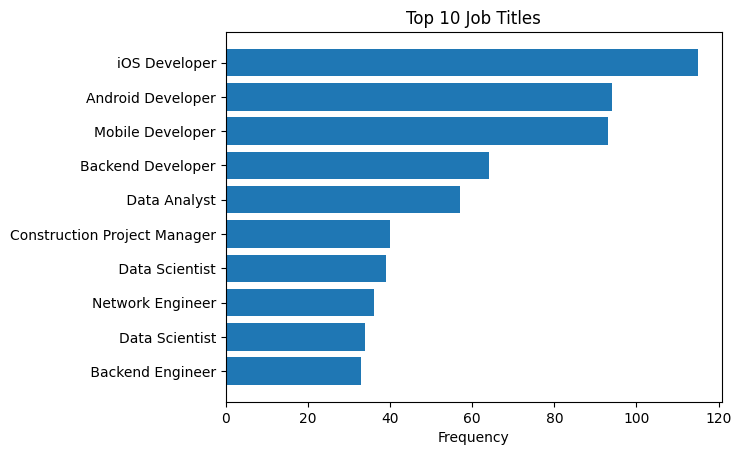

In [ ]:
import matplotlib.pyplot as plt
titles = list(title.values())
labels = list(title.keys())
labels.reverse()
titles.reverse()
plt.barh(labels, titles, animated=True)
plt.title("Top 10 Job Titles")
plt.xlabel("Frequency")
plt.show()

In [ ]:
l = df['Country'].value_counts()[0:10]
d = dict(l)
print(d)

{'United States of America': 1617, 'South Africa': 592, 'Tunisia': 342, 'France': 172, 'Germany': 164, 'United Kingdom': 151, 'Europe, the Middle East and Africa': 117, 'Canada': 96, 'Egypt': 94, 'Nigeria': 66}


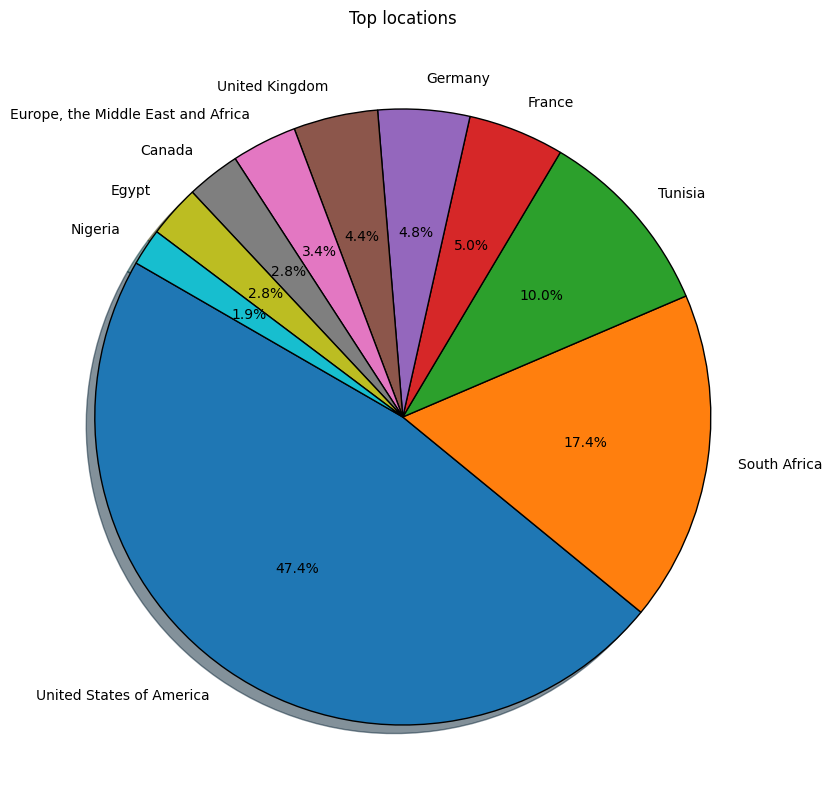

In [ ]:
slices = list(d.values())
labels = list(d.keys())
fig = plt.figure(figsize=(10, 10))

plt.pie(slices, labels=labels, shadow=True, startangle=150, autopct="%1.1f%%",wedgeprops={'edgecolor':'black'})
plt.title("Top locations")

plt.show()

# Baseline & Features
  Let's create some general statistical text features form the Job Description.
---

*  Word Count - Total number of words

*   Character Count - Total number of characters excluding spaces

*   Word Density - Average length of the words used

*   Punctuation Count - Total number of punctuations used




### **Tokenization**

In [ ]:
nltk.download('punkt')
df_desc=pd.DataFrame()
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
df_desc['lower_description'] = df.desc_sum1.str.lower()
tokenizer = RegexpTokenizer(r"\w+")
df_desc['word_tokenized'] = df_desc.lower_description.apply(lambda row: tokenizer.tokenize(row))
df_desc['sentence_tokenized'] = df_desc.lower_description.apply(lambda row: sent_tokenize(row))
df_desc.info()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3985 entries, 0 to 3984
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   lower_description   3985 non-null   object
 1   word_tokenized      3985 non-null   object
 2   sentence_tokenized  3985 non-null   object
dtypes: object(3)
memory usage: 93.5+ KB


# Word Count

<ipython-input-41-01cf2b3dea33>:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_desc['word_count'])


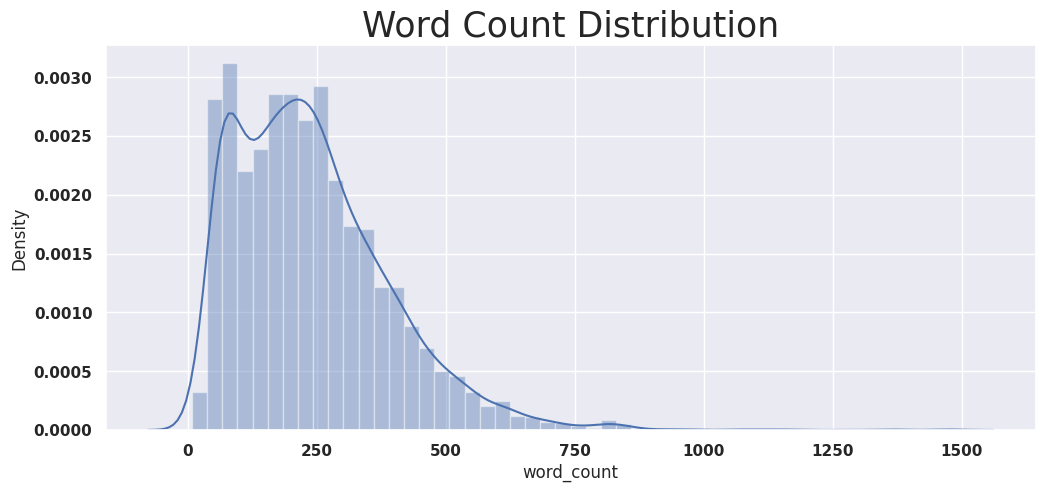

In [ ]:
# obtains a word count for each individual job description 
import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns
from wordcloud import WordCloud
sns.set()
# # used for better images in medium article
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

matplotlib.rc('font', **font)
df_desc['word_count'] = df_desc.word_tokenized.str.len()
plt.figure(figsize = (12,5))
sns.distplot(df_desc['word_count'])
plt.title('Word Count Distribution', size = 25);


# Stop Words

In [ ]:
nltk.download('stopwords')
def stopword_removal(text):
    stop_words = set(stopwords.words('english'))
    cleaned = [word for word in text if word not in stop_words]
    return cleaned
df_desc['clean_words'] = df_desc.word_tokenized.apply(stopword_removal)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


 Stemming & Lemmatization

In [ ]:
# stemmed and lemma words were both examined to choose which method was best suited
nltk.download('wordnet')
nltk.download('omw-1.4')
def stemming(text):
    porter = PorterStemmer()
    stemmed = [porter.stem(word) for word in text]
    return stemmed

def lemming(text):
    lemmatizer = WordNetLemmatizer()
    lemmed = [lemmatizer.lemmatize(word) for word in text]
    return lemmed

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
df_desc['clean_stemmed'] = df_desc.clean_words.apply(stemming)
df_desc['clean_lemmed'] = df_desc.clean_words.apply(lemming)
df_desc['clean_lemmed'].head()

0    [help, shape, future, frictionless, commerce, ...
1    [people, centric, approach, toward, culture, c...
2    [looking, add, experienced, sale, rep, account...
3    [must, work, closely, scientist, data, science...
4    [within, growing, team, play, key, role, devel...
Name: clean_lemmed, dtype: object

### general corpus & one distinguished with lemmatization applied to be used with an additional for loop in the future

In [ ]:
lem_corpus = []
for row in df_desc.clean_lemmed:
    lem_corpus += row
stem_corpus = []
for row in df_desc.clean_stemmed:
    stem_corpus += row

# Frequent Words

In [ ]:
def get_top_n_words(corpus):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in      
                   vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                       reverse=True)
    return words_freq
stem_corpus = []
for row in df_desc.clean_stemmed:
    stem_corpus += row

# Stemmed

(-0.5, 399.5, 199.5, -0.5)

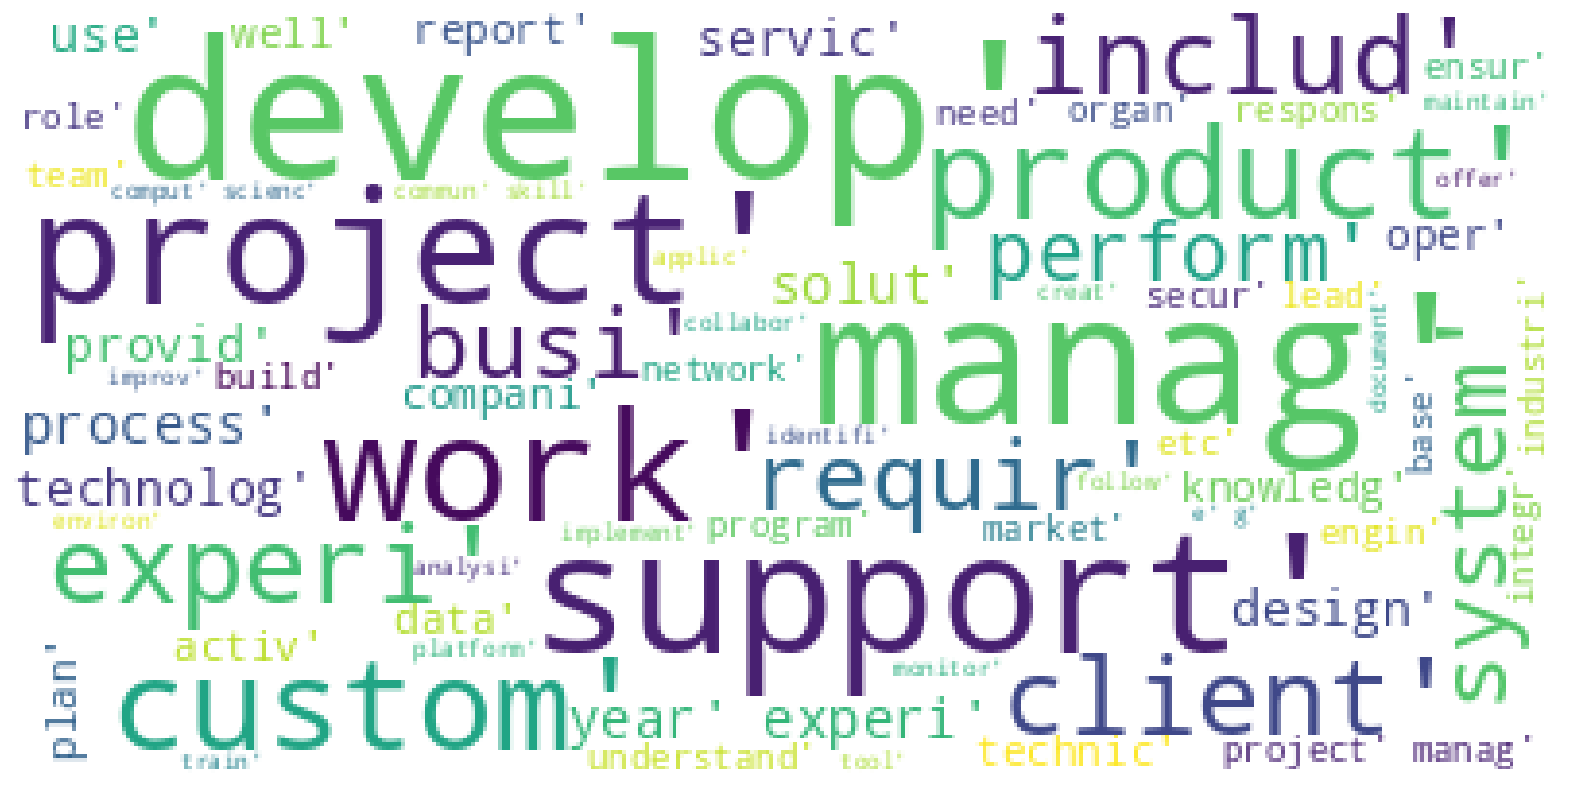

In [ ]:
stem_wordcloud = WordCloud(
                          background_color='white',
                          max_words=100,
                          max_font_size=50, 
                          min_font_size = 6,
                          random_state=42 ).generate(str(stem_corpus))

fig = plt.figure(1, figsize = (20,15))
plt.imshow(stem_wordcloud)
plt.axis('off')

In [ ]:
#Convert most freq words to dataframe for plotting bar plot
top_stem_words = get_top_n_words(stem_corpus)
top_stem = pd.DataFrame(top_stem_words)
top_stem.columns=["Word", "Freq"]

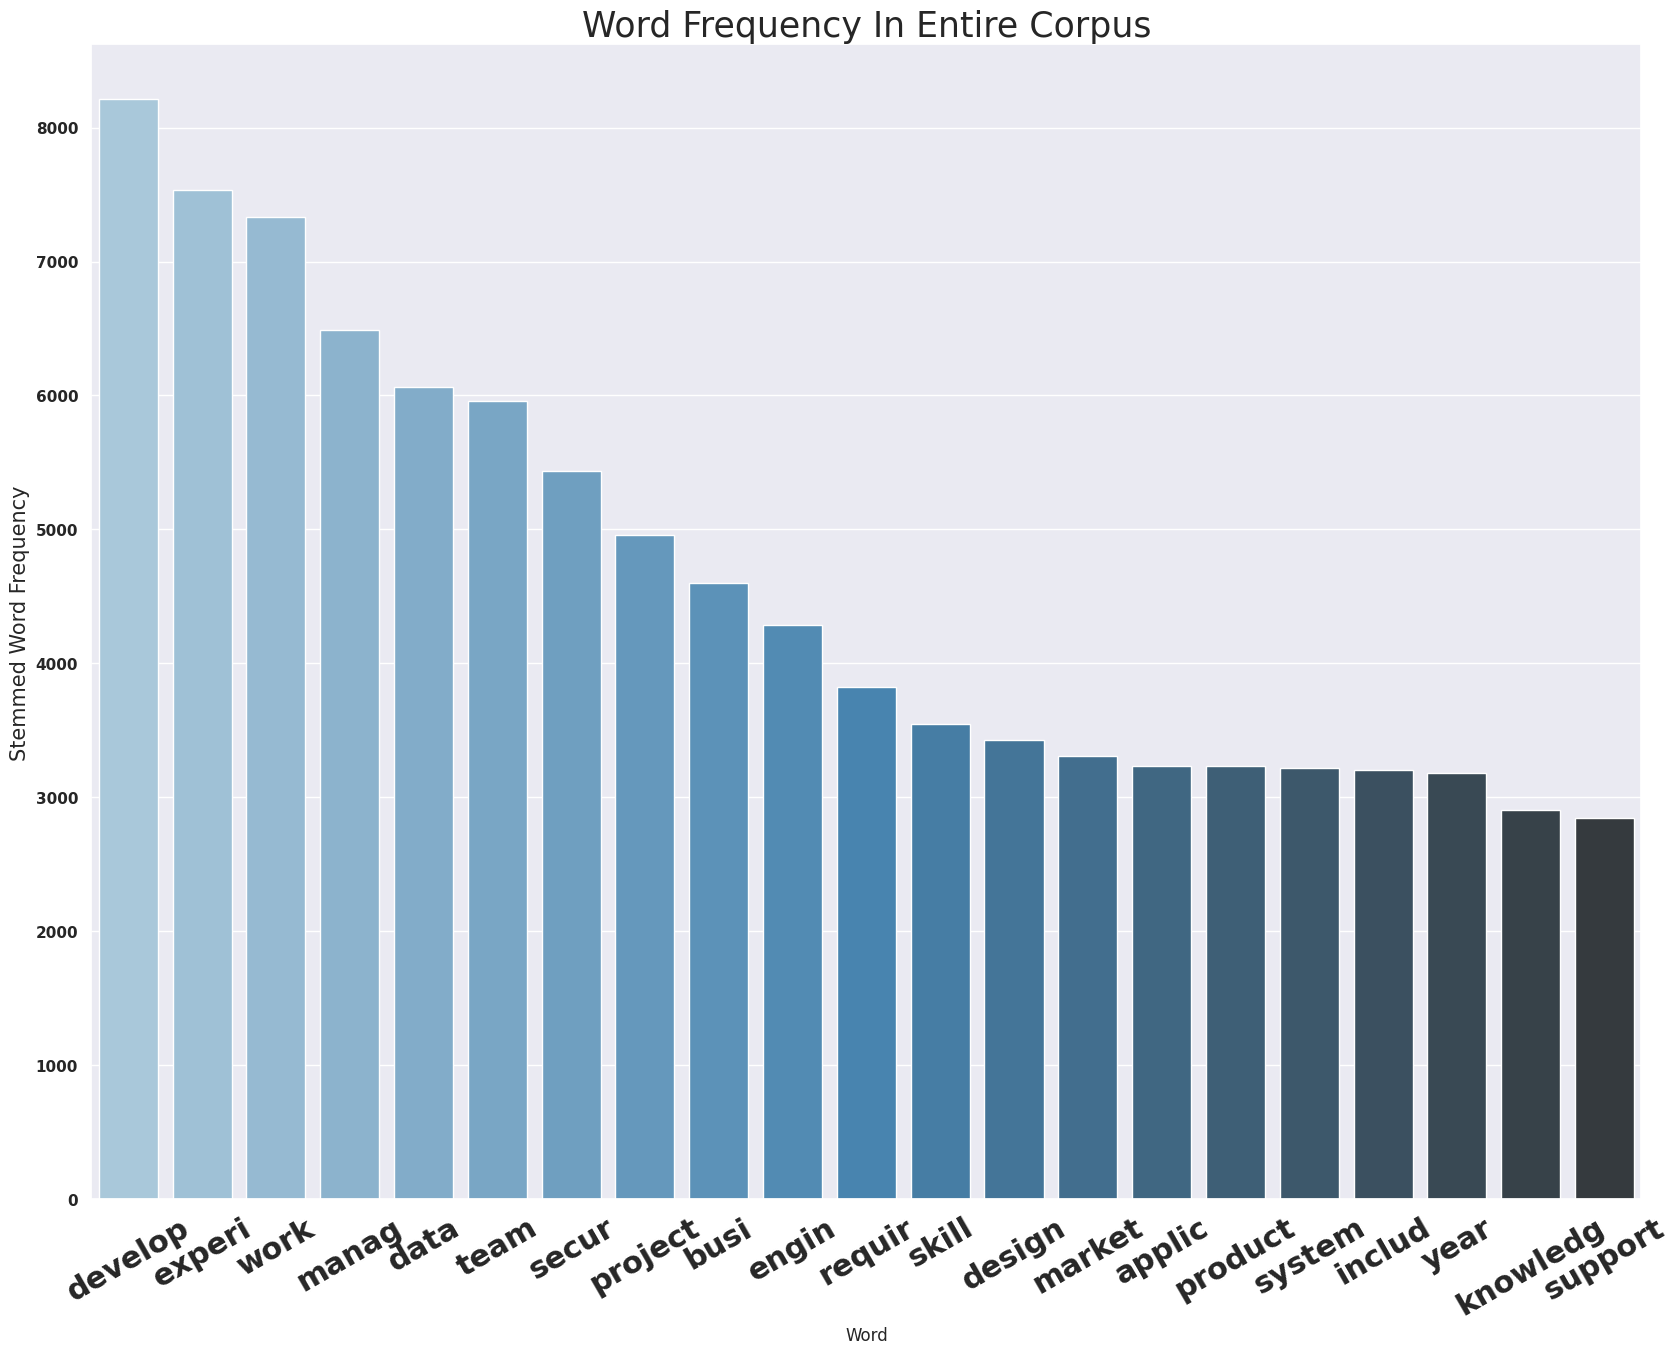

In [ ]:
#Barplot of most freq words
sns.set(rc={'figure.figsize':(20,15)})
stem_bar = sns.barplot(x="Word", y="Freq", data=top_stem[:21], palette="Blues_d")
plt.title('Word Frequency In Entire Corpus', size=25)
plt.ylabel('Stemmed Word Frequency', size = 15)
stem_bar.set_xticklabels(stem_bar.get_xticklabels(), rotation=30, fontsize = 22);


# Lemmatized

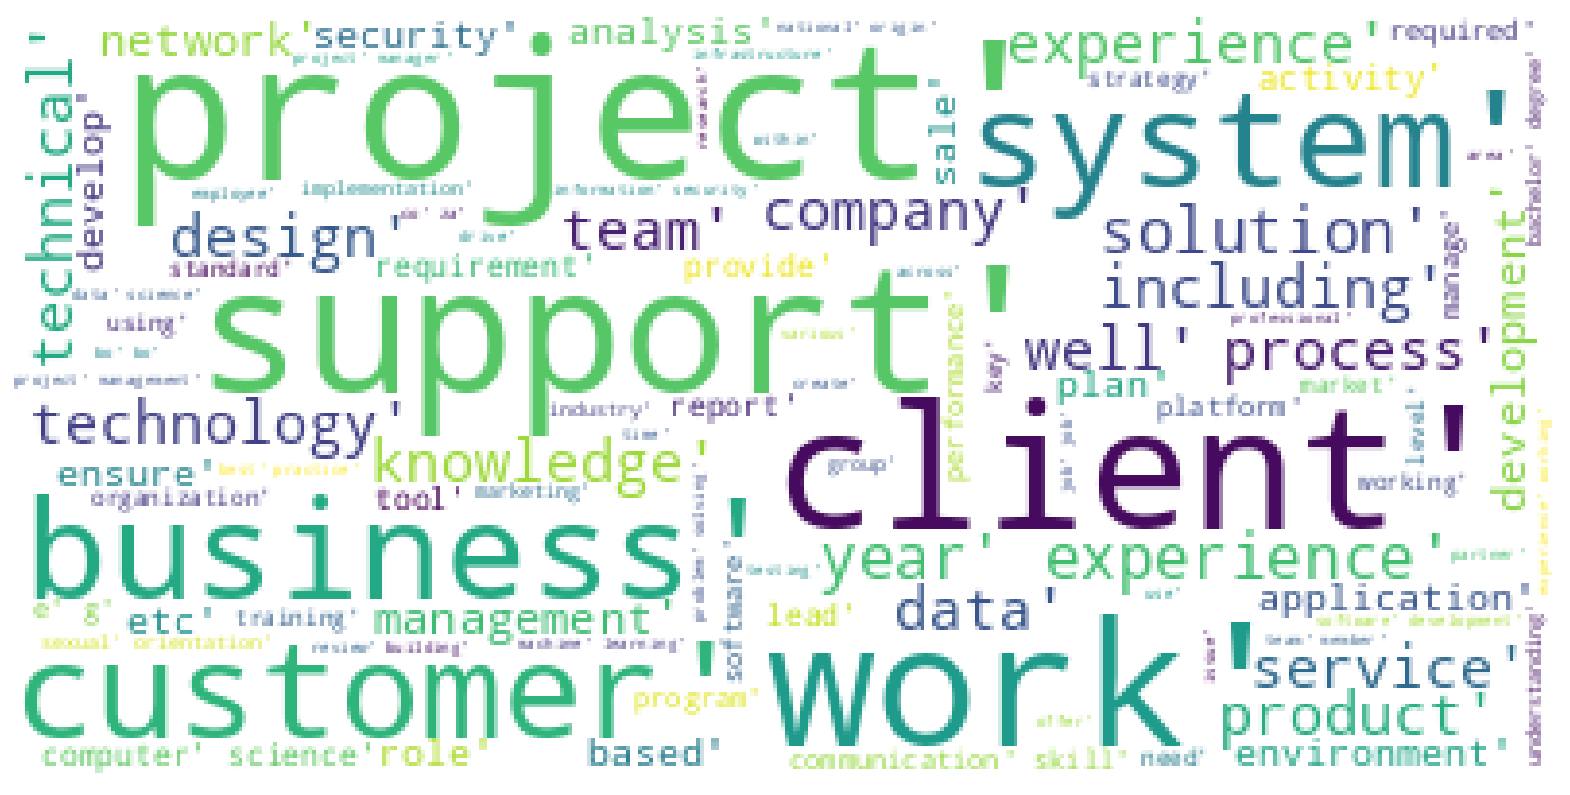

In [ ]:
wordcloud = WordCloud(
                          background_color='white',
                          max_words=100,
                          max_font_size=50, 
                          random_state=42
                         ).generate(str(lem_corpus))

fig = plt.figure(1, figsize = (20,15))
plt.imshow(wordcloud)
plt.axis('off');
# wordcloud.to_file('lemma_wordcloud.png');

In [ ]:
#Convert most freq words to dataframe for plotting bar plot
top_words = get_top_n_words(lem_corpus)
top_df = pd.DataFrame(top_words)
top_df.columns=["Word", "Freq"]

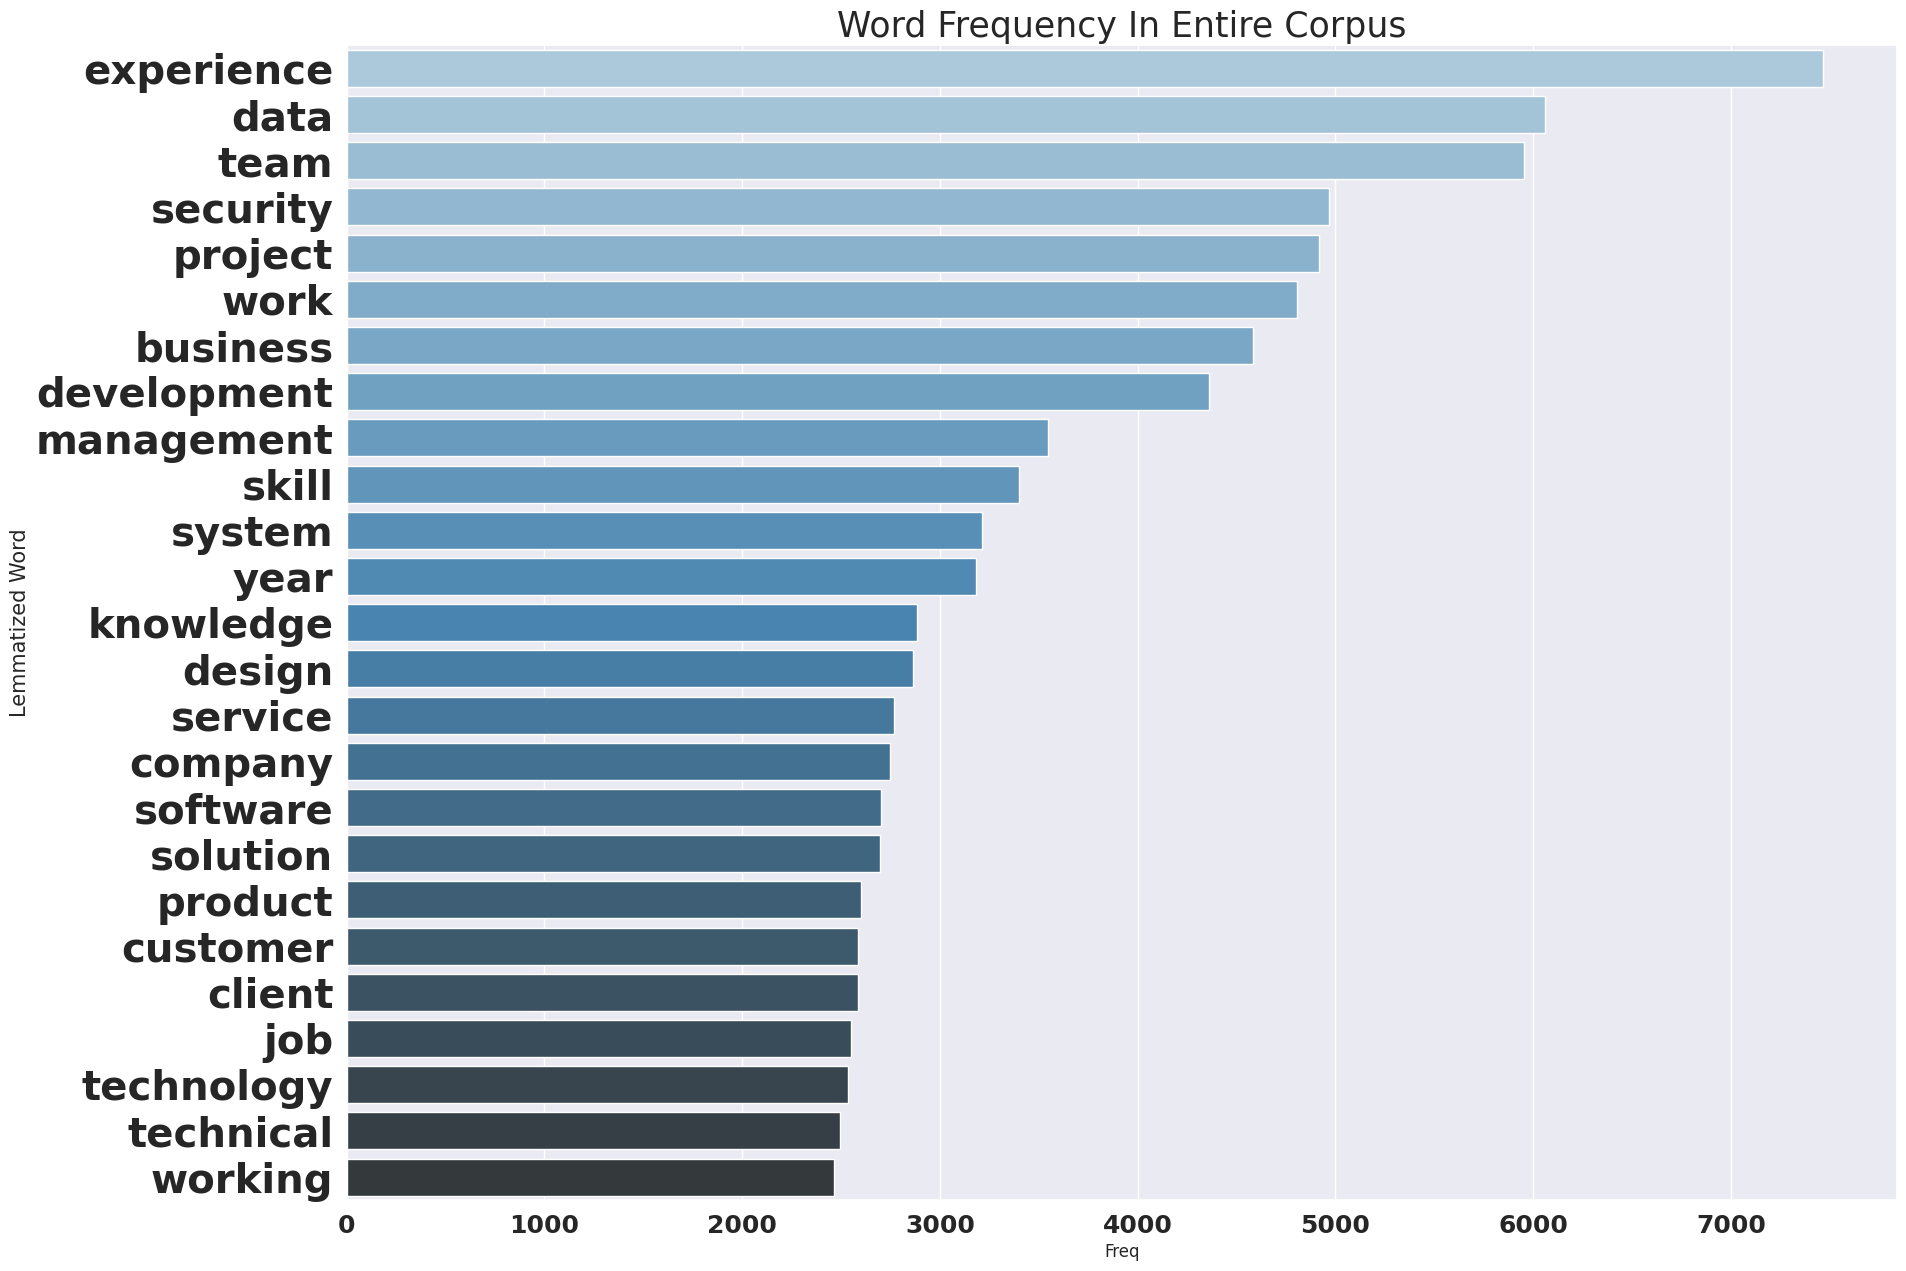

In [ ]:
#Barplot of most freq words
lem_bar = sns.barplot(y = "Word", x = "Freq", data = top_df[:25], palette = "Blues_d", orient = 'h')
lem_bar.set_yticklabels(lem_bar.get_yticklabels(), fontsize = 29);
plt.title('Word Frequency In Entire Corpus', size=25)
plt.ylabel('Lemmatized Word', size = 15)
plt.xticks(size = 18)
plt.savefig('freqWords_bar.png', dpi=400)

# Job Title 

In [ ]:
df_desc=pd.DataFrame()
df_desc['lower_Title'] = df.CleanTitle.str.lower()
tokenizer = RegexpTokenizer(r"\w+")
df_desc['word_tokenized'] = df_desc.lower_Title.apply(lambda row: tokenizer.tokenize(row))
df_desc['sentence_tokenized'] = df_desc.lower_Title.apply(lambda row: sent_tokenize(row))

<ipython-input-64-10a5172afc18>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_desc['word_count'])


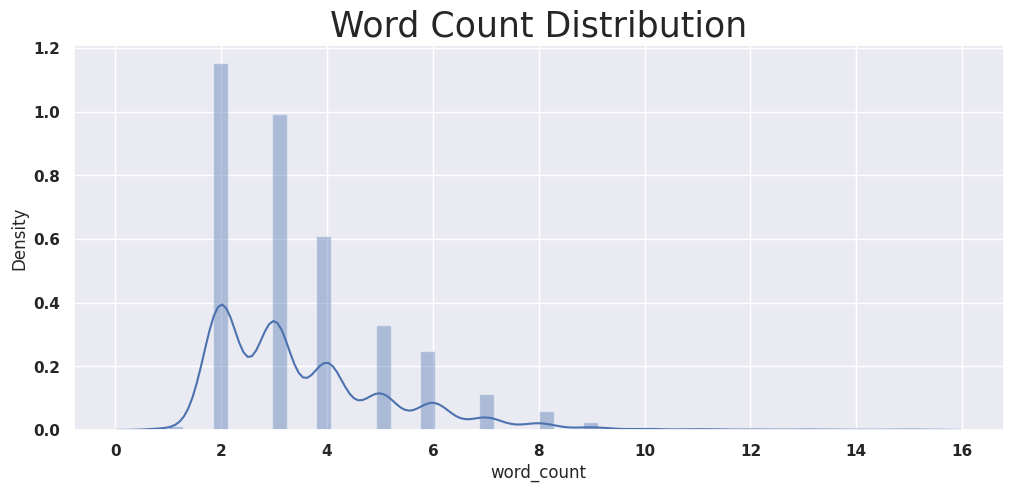

In [ ]:
df_desc['word_count'] = df_desc.word_tokenized.str.len()
plt.figure(figsize = (12,5))
sns.distplot(df_desc['word_count'])
plt.title('Word Count Distribution', size = 25);

In [ ]:
# Stop words 
nltk.download('stopwords')
def stopword_removal(text):
    stop_words = set(stopwords.words('english'))
    cleaned = [word for word in text if word not in stop_words]
    return cleaned
df_desc['clean_words'] = df_desc.word_tokenized.apply(stopword_removal)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# stemmed and lemma words were both examined to choose which method was best suited
nltk.download('wordnet')
nltk.download('omw-1.4')
def stemming(text):
    porter = PorterStemmer()
    stemmed = [porter.stem(word) for word in text]
    return stemmed

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [ ]:
def lemming(text):
    lemmatizer = WordNetLemmatizer()
    lemmed = [lemmatizer.lemmatize(word) for word in text]
    return lemmed
df_desc['clean_stemmed'] = df_desc.clean_words.apply(stemming)
df_desc['clean_lemmed'] = df_desc.clean_words.apply(lemming)
df_desc['clean_lemmed'].head()

0                 [software, engineer, data, platform]
1                 [software, engineer, data, pipeline]
2    [construction, electrical, staffing, sale, acc...
3         [manager, software, engineer, data, science]
4           [software, engineer, c, build, specialist]
Name: clean_lemmed, dtype: object

In [ ]:
df_desc['clean_stemmed'] = df_desc.clean_words.apply(stemming)
df_desc['clean_lemmed'] = df_desc.clean_words.apply(lemming)
df_desc['clean_lemmed'].head()

0                 [software, engineer, data, platform]
1                 [software, engineer, data, pipeline]
2    [construction, electrical, staffing, sale, acc...
3         [manager, software, engineer, data, science]
4           [software, engineer, c, build, specialist]
Name: clean_lemmed, dtype: object

In [ ]:
# general corpus & one distinguished with lemmatization applied
# to be used with an additional for loop in the future
lem_corpus = []
for row in df_desc.clean_lemmed:
    lem_corpus += row
stem_corpus = []
for row in df_desc.clean_stemmed:
    stem_corpus += row

In [ ]:
def get_top_n_words(corpus):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in      
                   vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                       reverse=True)
    return words_freq
stem_corpus = []
for row in df_desc.clean_stemmed:
    stem_corpus += row


1 Stemming

(-0.5, 399.5, 199.5, -0.5)

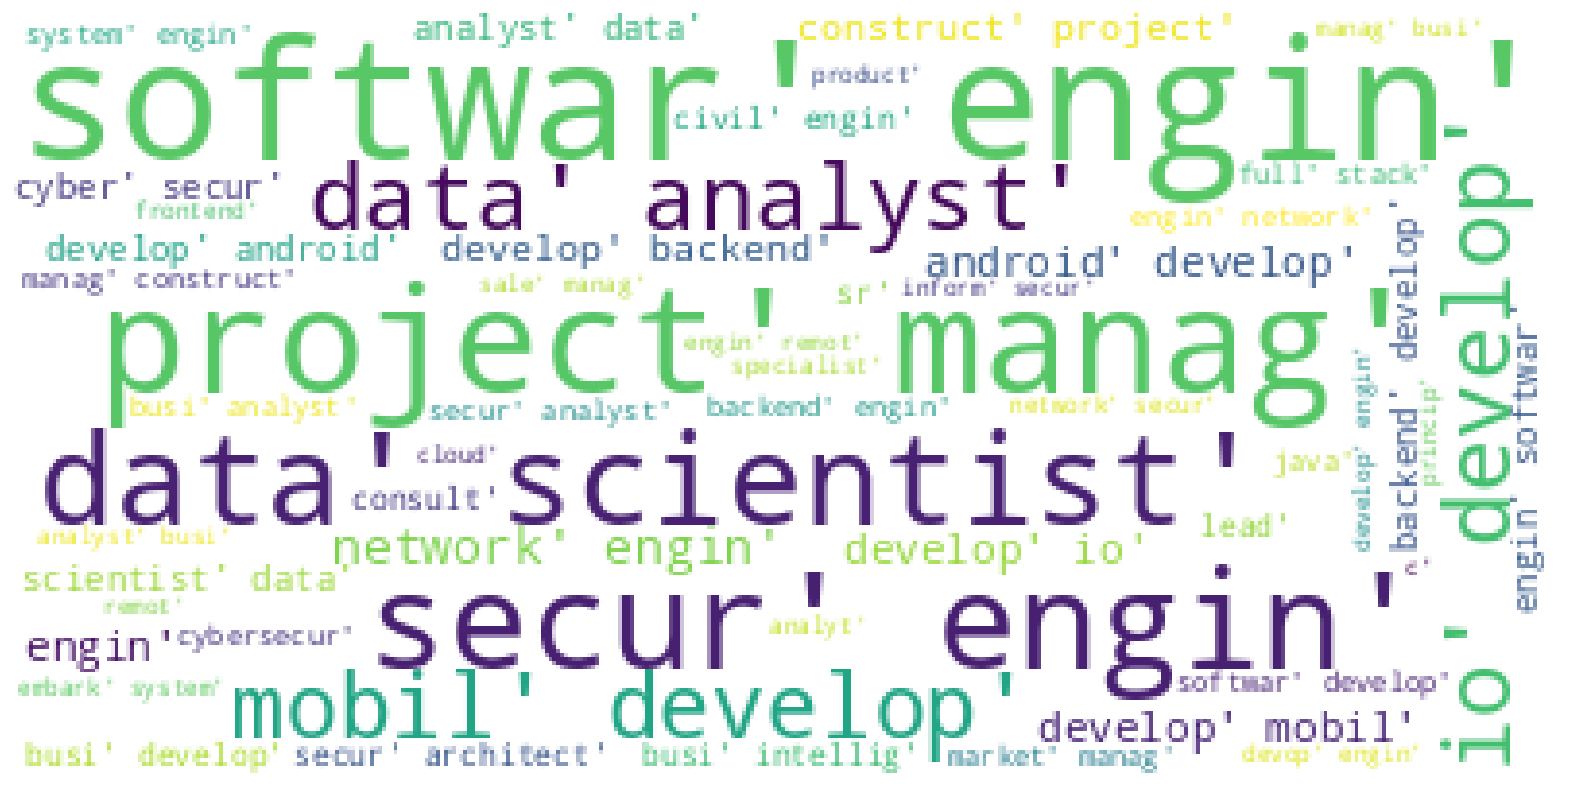

In [ ]:
# Stemmed
stem_wordcloud = WordCloud(
                          background_color='white',
                          max_words=100,
                          max_font_size=50, 
                          min_font_size = 6,
                          random_state=42 ).generate(str(stem_corpus))

fig = plt.figure(1, figsize = (20,15))
plt.imshow(stem_wordcloud)
plt.axis('off')
#Convert most freq words to dataframe for plotting bar plot


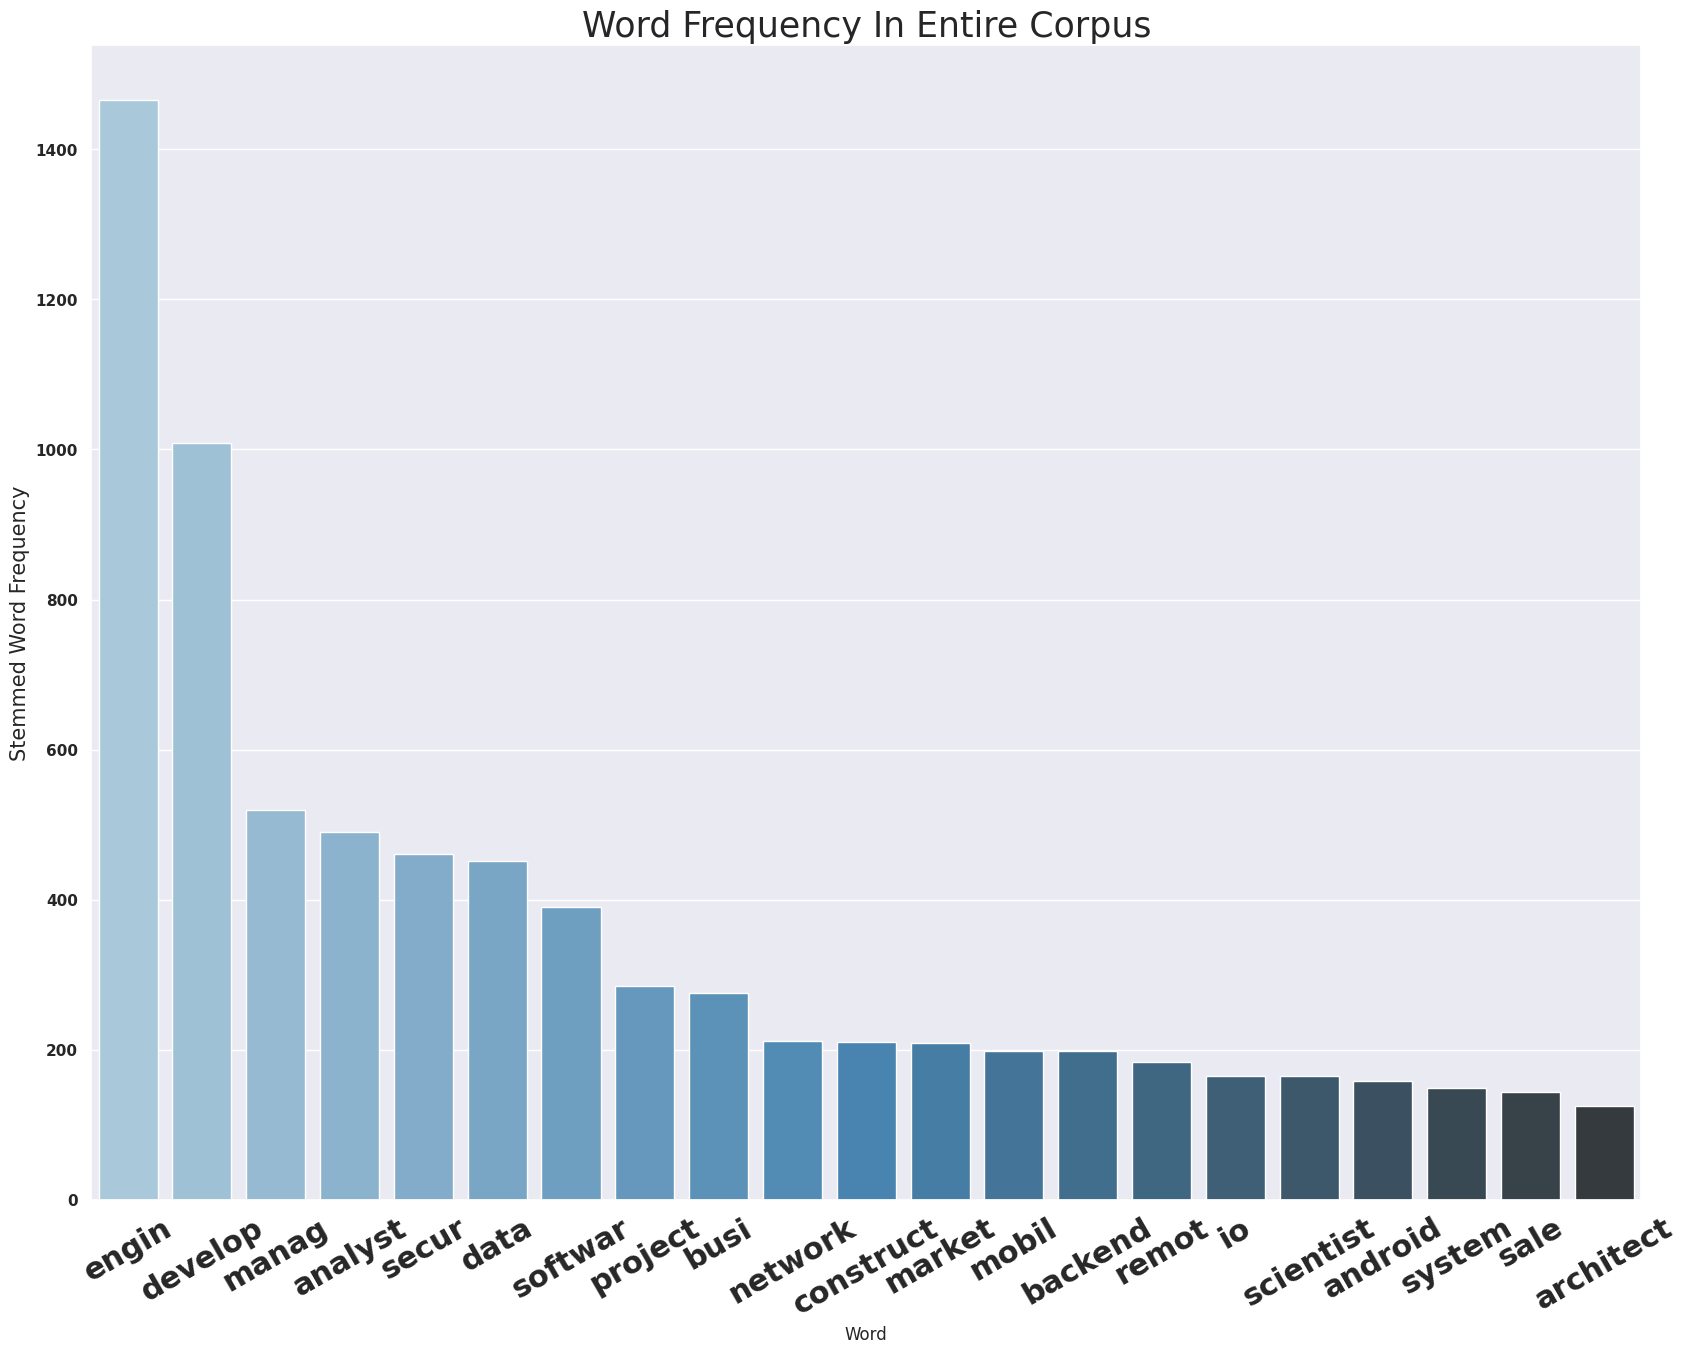

In [ ]:
top_stem_words = get_top_n_words(stem_corpus)
top_stem = pd.DataFrame(top_stem_words)
top_stem.columns=["Word", "Freq"]
#Barplot of most freq words
sns.set(rc={'figure.figsize':(20,15)})
stem_bar = sns.barplot(x="Word", y="Freq", data=top_stem[:21], palette="Blues_d")
plt.title('Word Frequency In Entire Corpus', size=25)
plt.ylabel('Stemmed Word Frequency', size = 15)
stem_bar.set_xticklabels(stem_bar.get_xticklabels(), rotation=30, fontsize = 22);

2. Lemmatization

In [ ]:
#Convert most freq words to dataframe for plotting bar plot
top_words = get_top_n_words(lem_corpus)
top_df = pd.DataFrame(top_words)
top_df.columns=["Word", "Freq"]

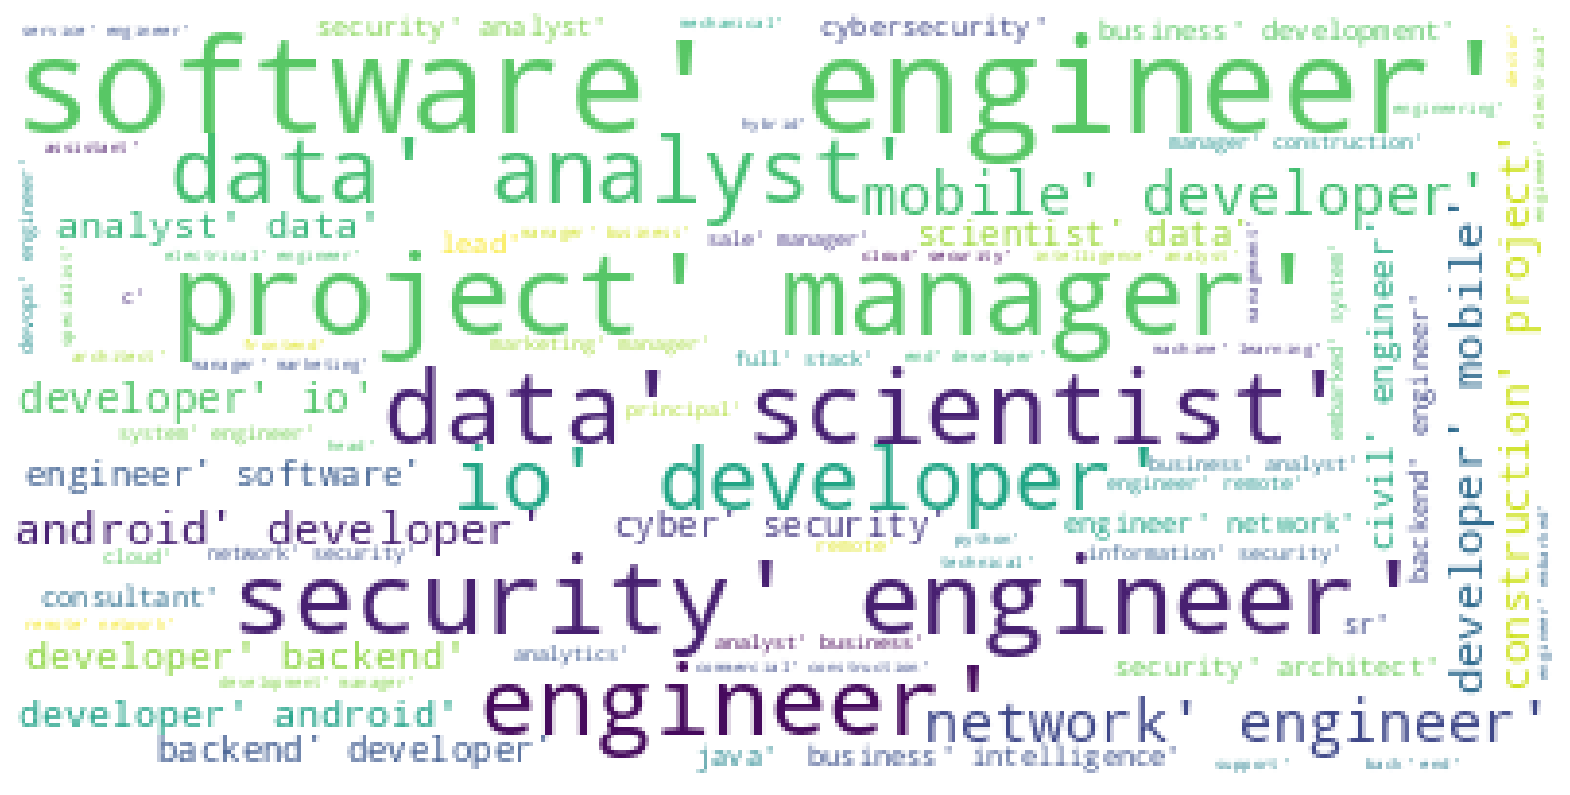

In [ ]:
wordcloud = WordCloud(
                          background_color='white',
                          max_words=100,
                          max_font_size=50, 
                          random_state=42
                         ).generate(str(lem_corpus))

fig = plt.figure(1, figsize = (20,15))
plt.imshow(wordcloud)
plt.axis('off');
# wordcloud.to_file('lemma_wordcloud.png');

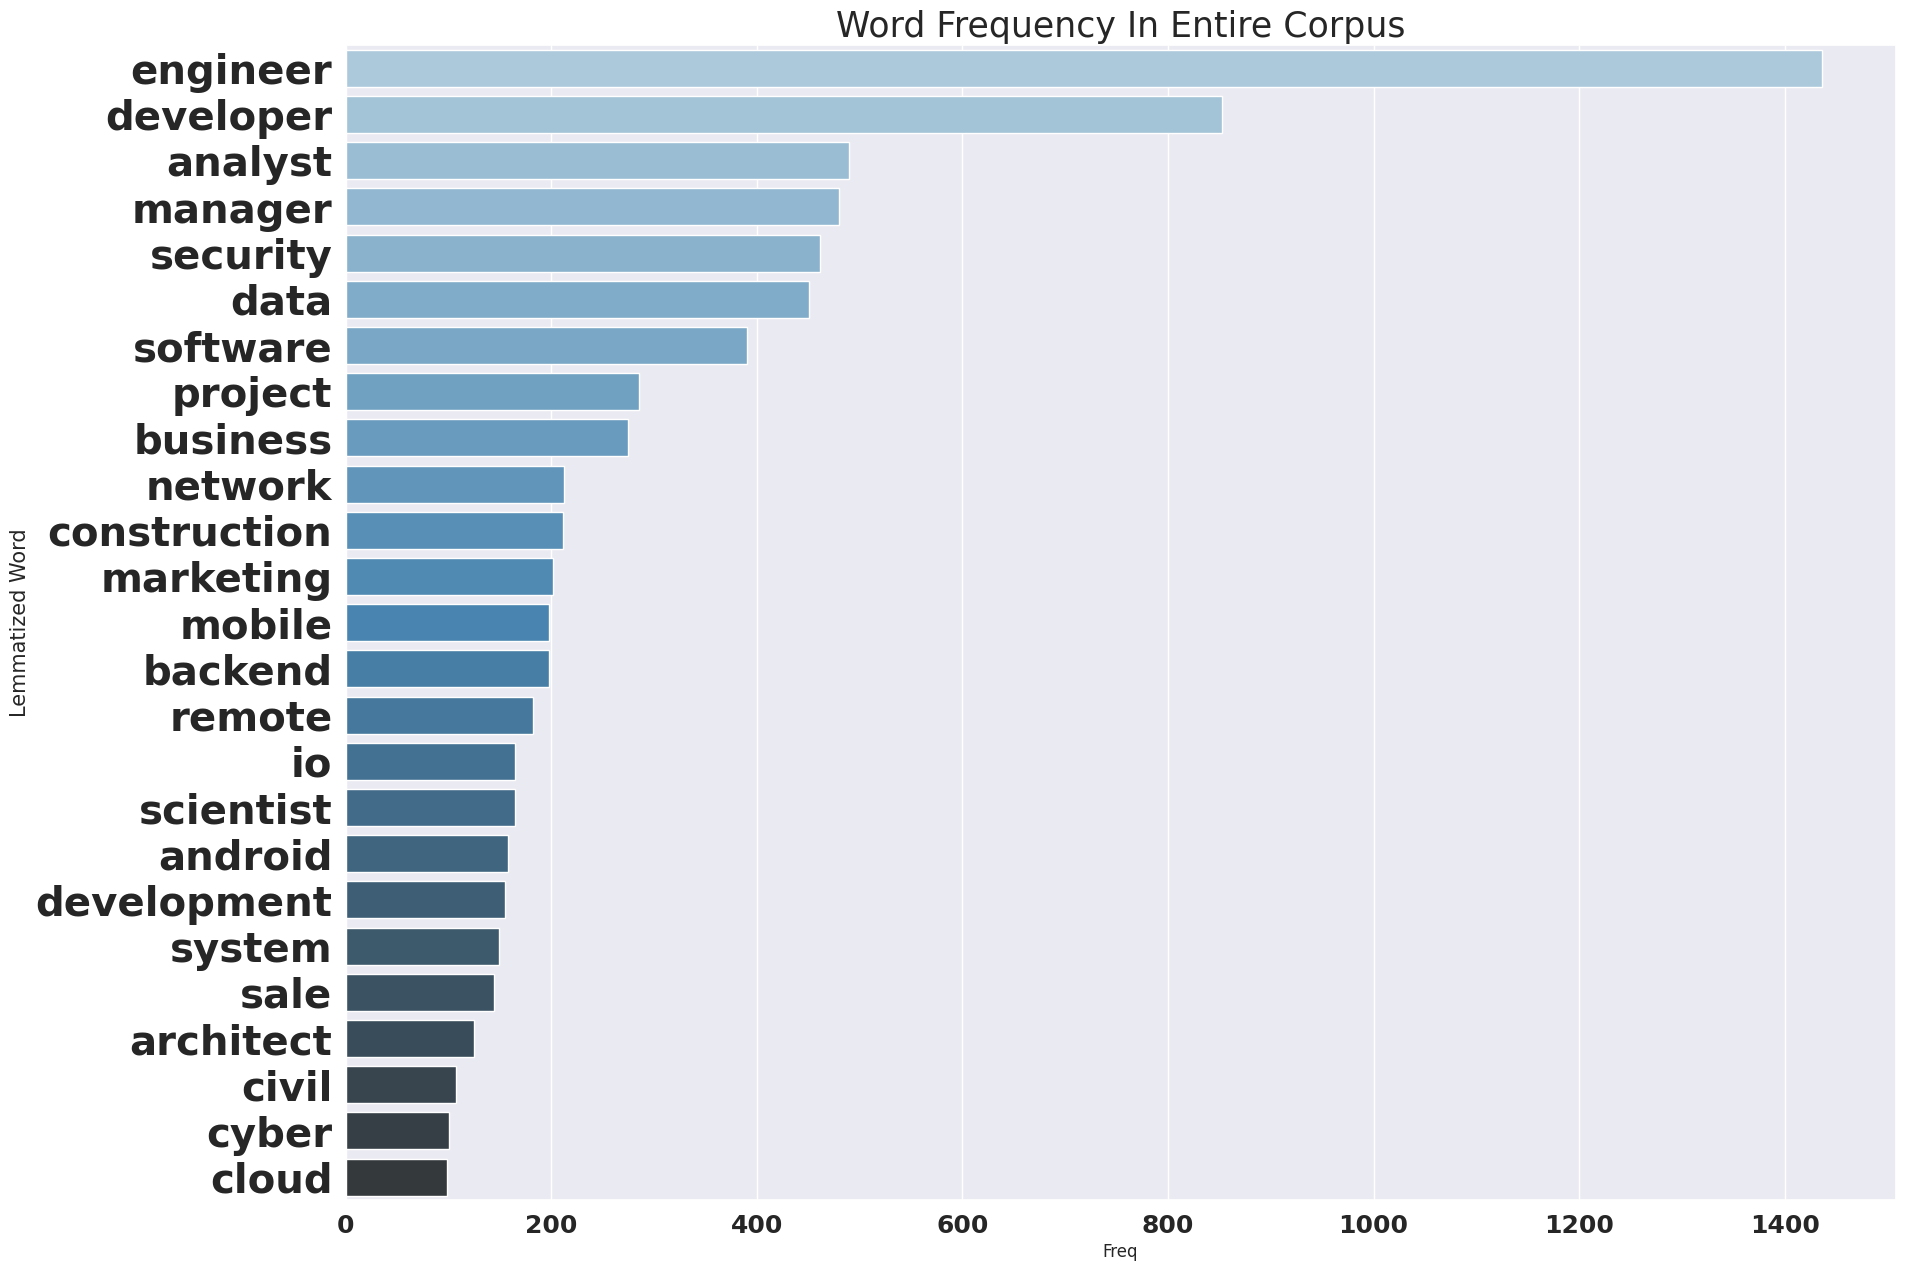

In [ ]:
#Barplot of most freq words
lem_bar = sns.barplot(y = "Word", x = "Freq", data = top_df[:25], palette = "Blues_d", orient = 'h')
lem_bar.set_yticklabels(lem_bar.get_yticklabels(), fontsize = 29);
plt.title('Word Frequency In Entire Corpus', size=25)
plt.ylabel('Lemmatized Word', size = 15)
plt.xticks(size = 18)
plt.savefig('freqWords_bar.png', dpi=400)

# N-grams
1- Bigram

In [ ]:
#Most frequently occuring Bi-grams
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

In [ ]:
# corpus with stopwords removed and list joined for n-gram distinction
ngram_corpus = df_desc.clean_words.str.join(' ')

In [ ]:
top2_words = get_top_n2_words(ngram_corpus, n = len(ngram_corpus))
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]

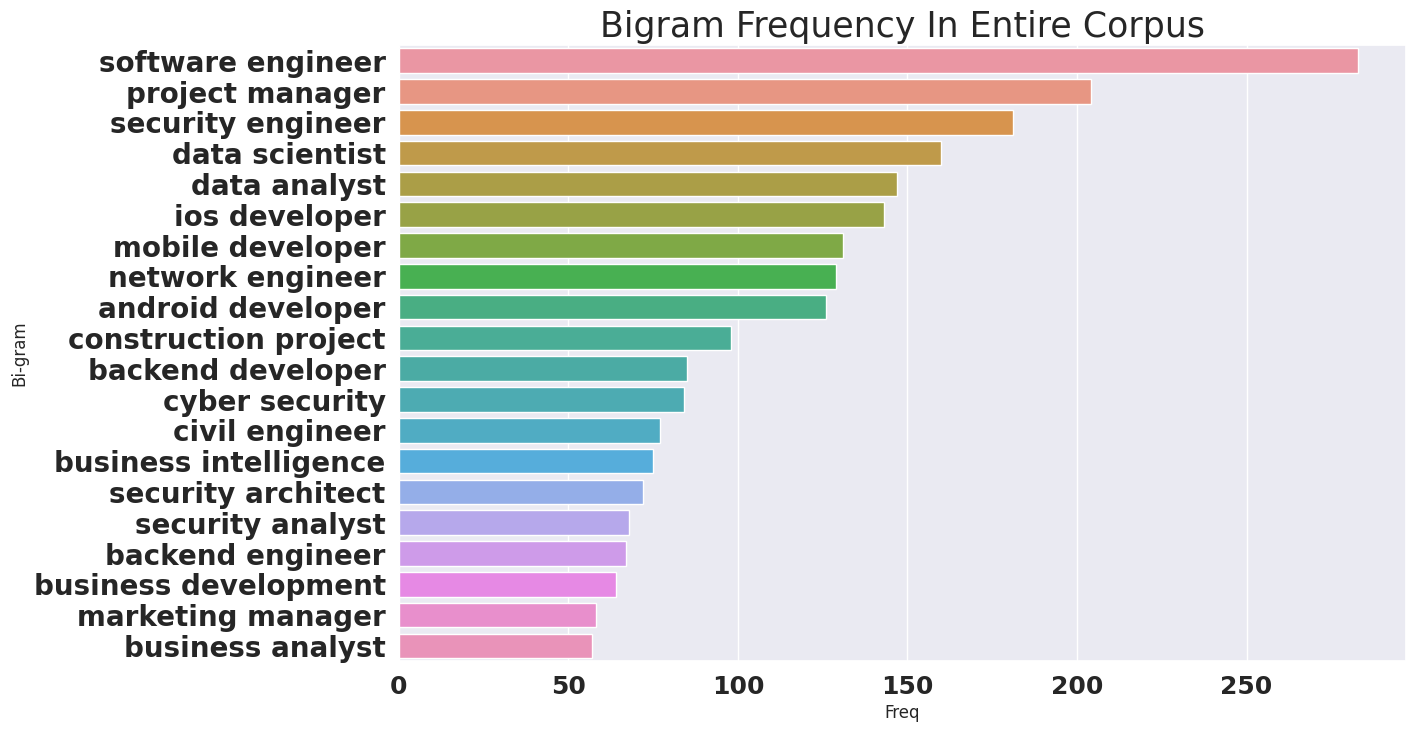

In [ ]:
#Barplot of most freq Bi-grams
sns.set(rc={'figure.figsize':(13,8)})
bbar = sns.barplot(y ="Bi-gram", x ="Freq", orient = 'h', data = top2_df[:20])
plt.title('Bigram Frequency In Entire Corpus', size=25)
plt.xticks(size = 18)
bbar.set_yticklabels(bbar.get_yticklabels(), fontsize = 20);
plt.savefig('bigram_bar.png', dpi=200)

- Trigrams

In [ ]:
#Most frequently occuring Tri-grams
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), 
           max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

In [ ]:
top3_words = get_top_n3_words(ngram_corpus, n = len(ngram_corpus))
top = pd.DataFrame(top3_words)
top.columns = ["Tri-gram", "Freq"]

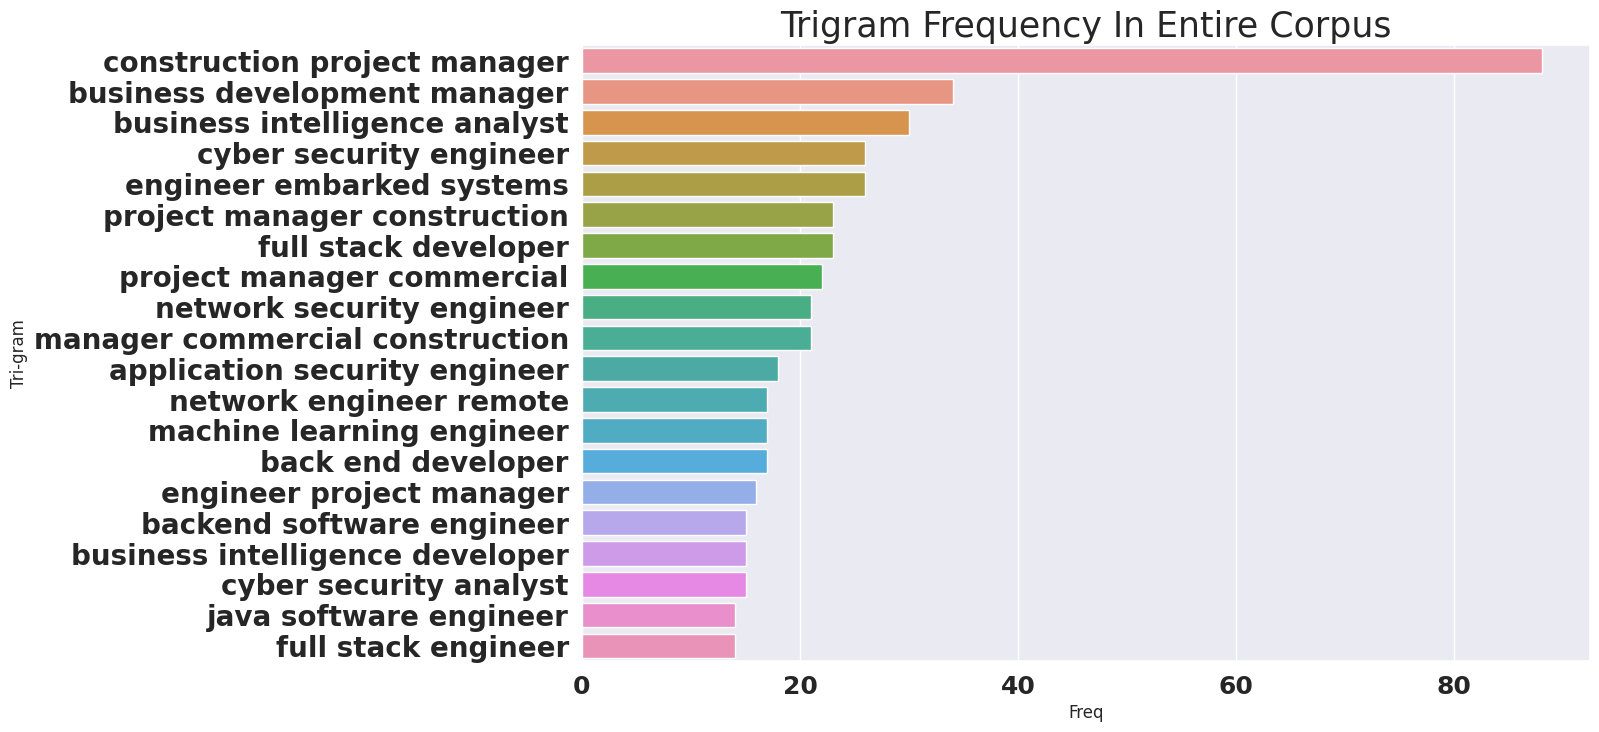

In [ ]:
#Barplot of most freq Tri-grams
plt.tight_layout()
sns.set(rc={'figure.figsize':(13,8)})
tbar = sns.barplot(y = "Tri-gram", x = "Freq", orient = 'h', data = top[:20])
plt.title('Trigram Frequency In Entire Corpus', size=25)
plt.xticks(size = 18)
tbar.set_yticklabels(tbar.get_yticklabels(), fontsize = 20);
plt.savefig('trigram_bar.png', dpi=200)

# Bert Topic

BERTopic is a machine learning technique used for topic modeling that utilizes transformers and c-TF-IDF to create dense clusters of similar documents, resulting in easily interpretable topics that contain the most relevant words. By using transformers, BERTopic can effectively capture the context and meaning of words and phrases, allowing for accurate topic modeling.

**Bert topic with Job Description**

In [ ]:
! pip install bertopic

In [ ]:
from bertopic import BERTopic
cleaned=stopword_removal(top2_dfJD['Bi-gram'])
corpora = cleaned
topic_model = BERTopic(language="english")
topics, probs = topic_model.fit_transform(corpora)

In [ ]:
topic_model.visualize_topics()


In [ ]:
topic_model.visualize_barchart()

**Bert topic with Job Title**

In [ ]:
corpora = stopword_removal(top['Tri-gram'])
topic_model = BERTopic(language="english")
topics, probs = topic_model.fit_transform(corpora)
topic_model.get_topic_info()

In [ ]:
topic_model.visualize_barchart()

In [ ]:
corpora = stopword_removal(top2_df['Bi-gram'])
topic_model = BERTopic(language="english")
topics, probs = topic_model.fit_transform(corpora)
topic_model.get_topic_info()

In [ ]:
topic_model.visualize_barchart()